# Tutorial week 9: Tree based Methods



The materials used in this tutorial are based on the applied exercises provided in the book "An Introduction to Statistical Learning with Applications in R" (ISLR). We are trying to demonstrate how to implement the following tree based method:

* Decision tree
* Random forest 
* Bagging 


First you need to install libraries

```r
install.packages("tree")
install.packages("randomForest")
```


## 1 Predict Sales using regression trees using the Carseats data set

First we will predict Sales from Carseats data set  using regression trees and related approaches, treating the response as a quantitative variable.


Let's first check help file of the tree library.

In [1]:
#load the tree library
require(tree)
help(tree)

Loading required package: tree


Load the Carseats data

In [2]:
library(ISLR)
#check the data
?Carseats

In [3]:
head(Carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1  9.50 138        73    11          276        120   Bad       42  17       
2 11.22 111        48    16          260         83   Good      65  10       
3 10.06 113        35    10          269         80   Medium    59  12       
4  7.40 117       100     4          466         97   Medium    55  14       
5  4.15 141        64     3          340        128   Bad       38  13       
6 10.81 124       113    13          501         72   Bad       78  16       
  Urban US 
1 Yes   Yes
2 Yes   Yes
3 Yes   Yes
4 Yes   Yes
5 Yes   No 
6 No    Yes

### 1.1 Split the data set into a training set and a test set.


In [4]:
## First we will set seed for sampling
set.seed(1)
train <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
train <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
Carseats.train <- Carseats[train, ]
Carseats.test <- Carseats[-train, ]

### 1.2 Fit a regression tree with training data set and testing with the testing dataset data set

Frist fit a regression tree with the training data. Plot the tree, and interpret the results. Then test with the testing data. What test MSE do you obtain?


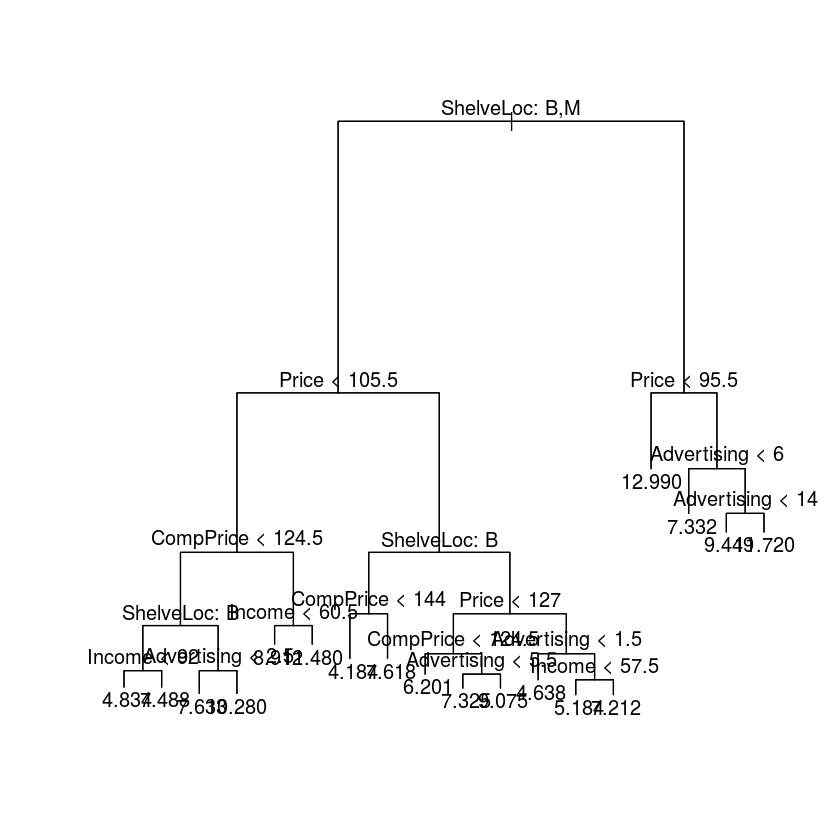

In [34]:
#fit a regression tree
tree.carseats <- tree(Sales ~ ., data =Carseats.train  )
#plot the tree
plot(tree.carseats)
text(tree.carseats, pretty = 1)

In [6]:
#print out the summary 
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Income"      "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.01 = 365.9 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.47800 -0.92200  0.05989  0.00000  0.87520  3.28200 

In [7]:
yhat <- predict(tree.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 4.970093

The MSE is **4.97**.

### 1.3  Use cross-validation in order to determine the optimal level of tree complexity. 

Does pruning the tree improve the test MSE?

In [8]:
#cross-validation
cv.carseats <- cv.tree(tree.carseats)
#check results
cv.carseats

$size
 [1] 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1]  917.4606  932.2003  934.3331  949.2520  963.9997  963.9997  977.5312
 [8]  939.4209  911.1159 1036.2612 1045.3926 1045.3926 1059.7791 1136.9480
[15] 1182.9664 1201.6725 1329.6818 1655.2166

$k
 [1]      -Inf  18.38200  19.62367  21.67706  24.59132  24.65927  26.97450
 [8]  30.07604  34.47996  52.83312  58.98468  59.10987  59.57200  81.15337
[15]  96.79627 100.14499 210.77325 358.95087

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [9]:
#find the lowest dev
tree.min <- which.min(cv.carseats$dev)
cv.carseats$size[tree.min]

[1] 10

The tree  with 10 terminal nodes has the lowest corss-validation error rate.  Let's plot the results:

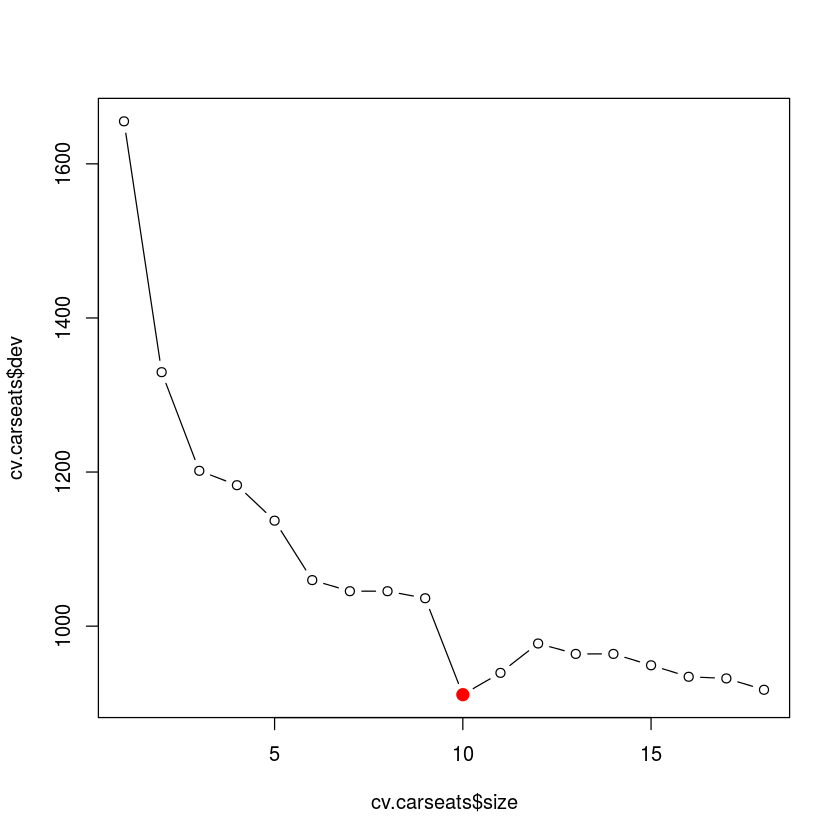

In [10]:
plot(cv.carseats$size, cv.carseats$dev, type = "b")
points(cv.carseats$size[tree.min], cv.carseats$dev[tree.min], col = "red", cex = 2, pch = 20)

Now we prune the tree to obtain the 10 node tree.

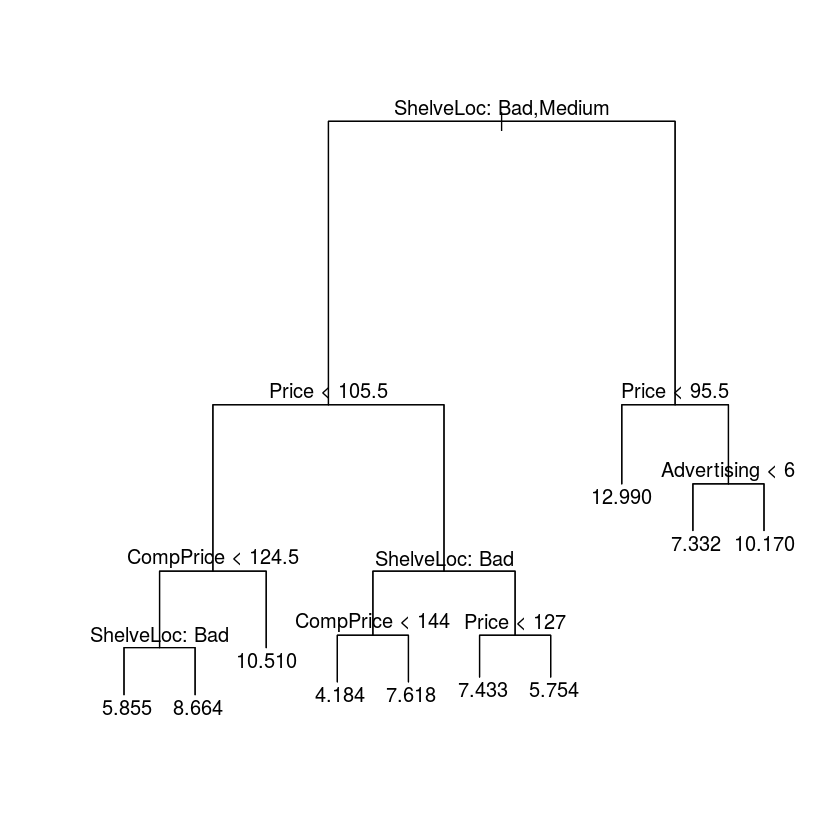

In [11]:
# use prune.tree function
prune.carseats <- prune.tree(tree.carseats, best = 10)
#plot the tree
plot(prune.carseats)
text(prune.carseats, pretty = 0)

Next we will obtaine the MSE for the pruned tree.

In [12]:
yhat <- predict(prune.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 4.980654

In this case there is no substantial difference in MSR, but the pruned tree only has 10 terminal nodes compared with 18 terminal notes obtained using regression tree directly.

### 1.4  Use the bagging approach in order to analyze this data. 

What test MSE do you obtain? Use the importance() function to determine which variables are most important. 


Let's load the library first and check the help file.

In [13]:
#load the randomForest library
require(randomForest)
help(randomForest)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


There are 10 predictors so we will set mtry=10.

In [14]:
#fit with training data
set.seed(1)
bag.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, importance = TRUE)
#predict on testing data
yhat.bag <- predict(bag.carseats, newdata = Carseats.test)
#Calculate MSE
mean((yhat.bag - Carseats.test$Sales)^2)

[1] 2.66455

We may see that bagging decreases the Test MSE to 2.7.

In [15]:
importance(bag.carseats)

%IncMSE    IncNodePurity
CompPrice   21.1823752 157.236786   
Income       5.8010124  79.825187   
Advertising 18.8225951 150.067768   
Population   0.6326265  60.110953   
Price       53.6753162 491.190964   
ShelveLoc   53.6478386 435.734744   
Age         19.3674348 157.049477   
Education    0.3319883  46.124199   
Urban        0.4567516   8.532357   
US           4.5523993  10.352739

### 1.5  Use the random forests approach in order to analyze this data. 

What test MSE do you obtain? Use the importance() function to determine which variables are most important. 
Describe the effect of m, the number of variables considered at each split, on the error rate obtained. In this case, we choose m=√p


In [16]:
#fit with training data
set.seed(1)
rf.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 3, ntree = 500, importance = TRUE)
#pedict on testing data
yhat.rf <- predict(rf.carseats, newdata = Carseats.test)
#calculate MSE
mean((yhat.rf - Carseats.test$Sales)^2)

[1] 3.042381

In this case we have a Test MSE of 3.0.

In [17]:
importance(rf.carseats)

%IncMSE     IncNodePurity
CompPrice   12.16665959 145.18416    
Income      -1.07978037 112.19905    
Advertising 12.20916962 153.53374    
Population  -0.01616613 100.12029    
Price       35.87571339 400.94405    
ShelveLoc   36.23399051 346.67783    
Age         13.99356827 175.30102    
Education    1.04010913  72.25509    
Urban        0.51945533  14.58068    
US           3.41435727  23.19629

We may conclude that, in this case also, “Price” and “ShelveLoc” are the two most important variables.

## 2. Predict purchase in OJ dataset
In this question, we will treat <font color="brown">Purchase</font> as the response in <font color="brown">OJ</font> dataset. This dataset consists of 1070 observations on the following 18 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)

In [18]:
?OJ

In [19]:
head(OJ)

Purchase WeekofPurchase StoreID PriceCH PriceMM DiscCH DiscMM SpecialCH
1 CH       237            1       1.75    1.99    0.00   0.0    0        
2 CH       239            1       1.75    1.99    0.00   0.3    0        
3 CH       245            1       1.86    2.09    0.17   0.0    0        
4 MM       227            1       1.69    1.69    0.00   0.0    0        
5 CH       228            7       1.69    1.69    0.00   0.0    0        
6 CH       230            7       1.69    1.99    0.00   0.0    0        
  SpecialMM LoyalCH  SalePriceMM SalePriceCH PriceDiff Store7 PctDiscMM
1 0         0.500000 1.99        1.75         0.24     No     0.000000 
2 1         0.600000 1.69        1.75        -0.06     No     0.150754 
3 0         0.680000 2.09        1.69         0.40     No     0.000000 
4 0         0.400000 1.69        1.69         0.00     No     0.000000 
5 0         0.956535 1.69        1.69         0.00     Yes    0.000000 
6 1         0.965228 1.99        1.69         0.30     Yes    0.000000 
  PctDiscCH ListPriceDiff STORE
1 0.000000  0.24          1    
2 0.000000  0.24          1    
3 0.091398  0.23          1    
4 0.000000  0.00          1    
5 0.000000  0.00          0    
6 0.000000  0.30          0

In [20]:
table(OJ$Purchase)


 CH  MM 
653 417 

### 2.1 Create a training set containing a random sample of 800 observations, and a test set containing the remaining observation.

In [21]:
set.seed(1)
train = sample(1:nrow(OJ), 800)

In [22]:
tree.OJ = tree( Purchase ~ ., data=OJ[train,] )
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ[train, ])
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7305 = 578.6 / 792 
Misclassification error rate: 0.165 = 132 / 800 

### 2.3 Create a text output for the tree

In [23]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1064.00 CH ( 0.61750 0.38250 )  
   2) LoyalCH < 0.508643 350  409.30 MM ( 0.27143 0.72857 )  
     4) LoyalCH < 0.264232 166  122.10 MM ( 0.12048 0.87952 )  
       8) LoyalCH < 0.0356415 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.0356415 109  100.90 MM ( 0.17431 0.82569 ) *
     5) LoyalCH > 0.264232 184  248.80 MM ( 0.40761 0.59239 )  
      10) PriceDiff < 0.195 83   91.66 MM ( 0.24096 0.75904 )  
        20) SpecialCH < 0.5 70   60.89 MM ( 0.15714 0.84286 ) *
        21) SpecialCH > 0.5 13   16.05 CH ( 0.69231 0.30769 ) *
      11) PriceDiff > 0.195 101  139.20 CH ( 0.54455 0.45545 ) *
   3) LoyalCH > 0.508643 450  318.10 CH ( 0.88667 0.11333 )  
     6) LoyalCH < 0.764572 172  188.90 CH ( 0.76163 0.23837 )  
      12) ListPriceDiff < 0.235 70   95.61 CH ( 0.57143 0.42857 ) *
      13) ListPriceDiff > 0.235 102   69.76 CH ( 0.89216 0.10784 ) *
     7) LoyalCH > 0.764572 278   86.14 

### 2.4 Create a plot of the tree, and interpret the results

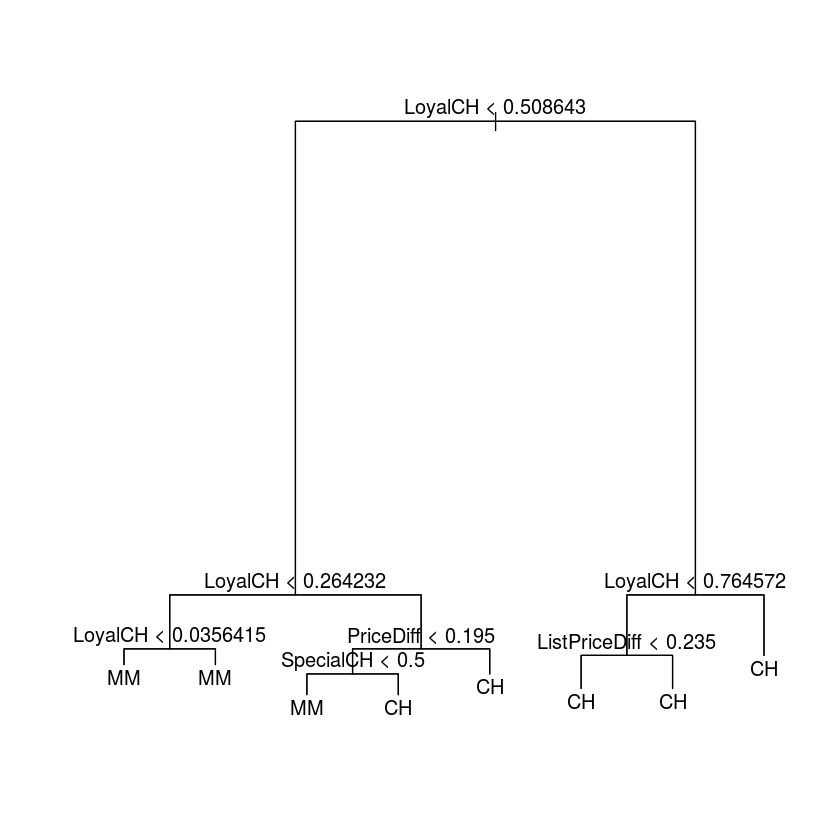

In [24]:
plot(tree.OJ)
text(tree.OJ, pretty = 0)

The important predictors that are used to construct the decision tree are "LoyalCH", "PriceDiff", "SpecialCH" and "ListPriceDiff". The train error rate is 0.165 for this classification tree. There are 8 termonal nodes in this tree.

### 2.5 Predict the response on the test data, and produce the confusion matrix comparing the test labels to the predicted test labels. What is the error rate?

In [27]:
y_hat = predict( tree.OJ, newdata=OJ[-train,], type="class" ) # gives classification labels
CM = table( y_hat, OJ[-train,]$Purchase )   # confusion matrix
print( CM )
print( 'original tree: classificaion error rate on the test dataset:')
#or print( ( CM[1,2] + CM[2,1] ) / sum(CM) )
mean(y_hat!=OJ[-train,]$Purchase)

     
y_hat  CH  MM
   CH 147  49
   MM  12  62
[1] "original tree: classificaion error rate on the test dataset:"


[1] 0.2259259

### 2.6 Apply the <font color="blue">cv.tree()</font> function to the training set in order to determine the optimal tree size. Produce plots with tree size and cross-validation classification error rate. Which tree size is chosen?

In [28]:
cv.OJ = cv.tree( tree.OJ, FUN=prune.misclass )
cv.OJ

$size
[1] 8 5 2 1

$dev
[1] 146 146 160 306

$k
[1]       -Inf   0.000000   4.666667 160.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

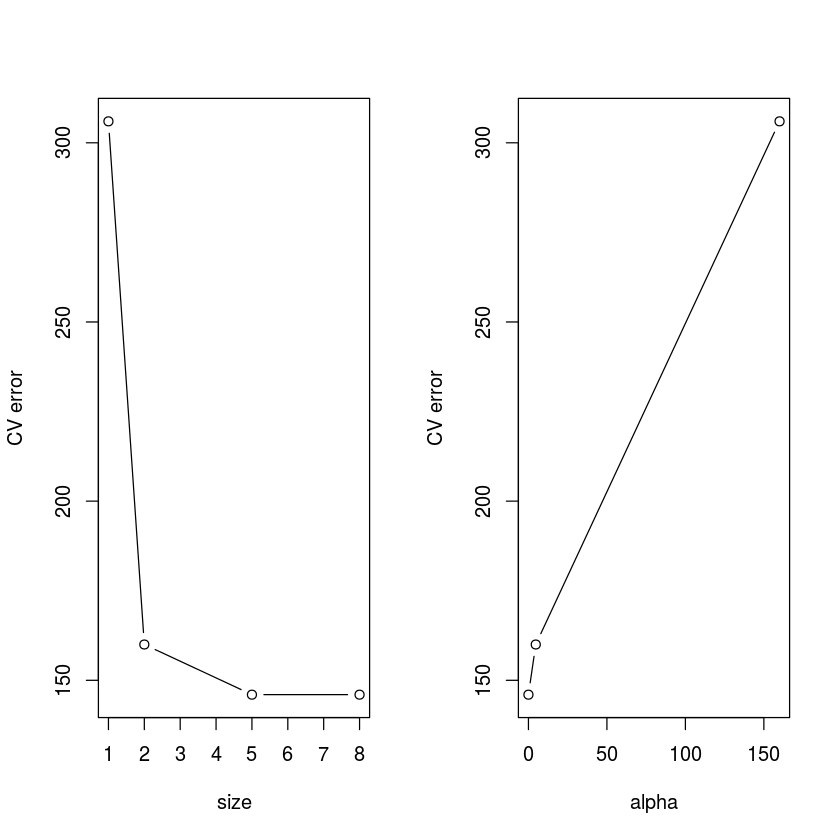

In [29]:
par(mfrow=c(1,2))
plot(cv.OJ$size, cv.OJ$dev, type ="b", xlab="size", ylab="CV error")
plot(cv.OJ$k, cv.OJ$dev, type ="b", xlab="alpha", ylab="CV error")

The best size number are 5 and 8. We choose 5.

### 2.7 Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.

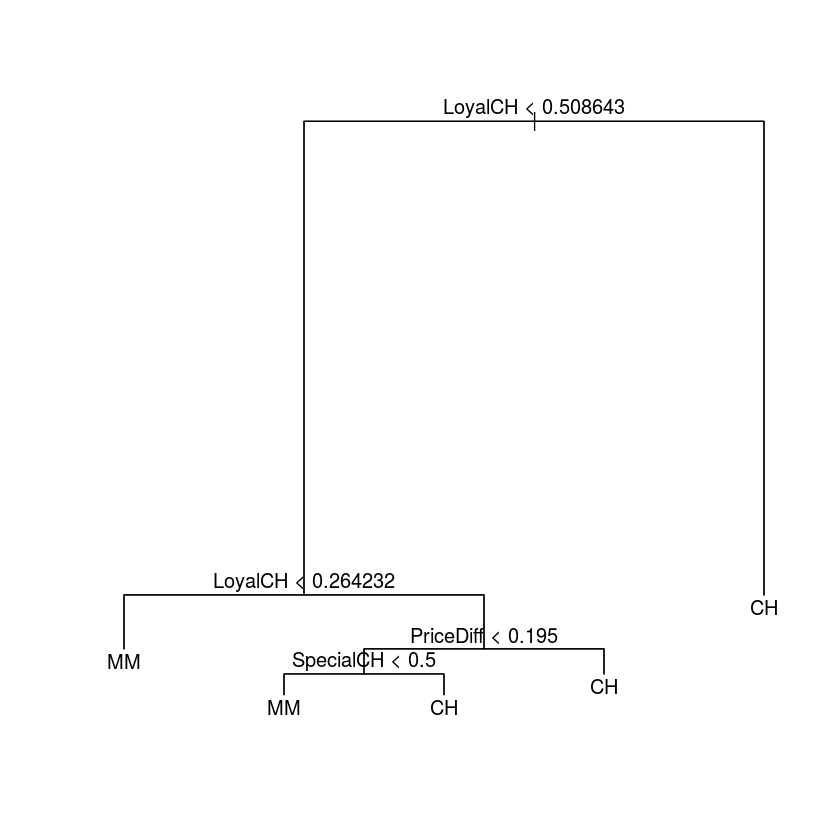

In [30]:
prune.OJ = prune.misclass( tree.OJ, best=5 )
plot(prune.OJ)
text(prune.OJ)

### 2.8 Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [31]:
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ[train, ])
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7305 = 578.6 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [32]:
summary(prune.OJ)


Classification tree:
snip.tree(tree = tree.OJ, nodes = 3:4)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "SpecialCH"
Number of terminal nodes:  5 
Residual mean deviance:  0.8256 = 656.4 / 795 
Misclassification error rate: 0.165 = 132 / 800 

The train error for both classification trees are the same at 0.165, but the residual mean deviance for the pruned tree is higher.

### 2.9 Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [33]:
y_hat.prune = predict( prune.OJ, newdata=OJ[-train,], type="class" ) # gives classification labels
CM.prune = table( y_hat.prune, OJ[-train,]$Purchase )   # confusion matrix
print( CM.prune )
print( 'prune tree: classificaion error rate on the test dataset:')
# or print( ( CM.prune[1,2] + CM.prune[2,1] ) / sum(CM.prune) )
mean(y_hat.prune!=OJ[-train,]$Purchase)

           
y_hat.prune  CH  MM
         CH 147  49
         MM  12  62
[1] "prune tree: classificaion error rate on the test dataset:"


[1] 0.2259259